In [3]:
#The tools I will be using for now, any tools to be imported will be added at the top if need be.
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
cd Desktop/ironhack/Pandas-Shark-Project/Input/

[WinError 3] The system cannot find the path specified: 'Desktop/ironhack/Pandas-Shark-Project/Input/'
C:\Users\Hassan\Desktop\ironhack\Pandas-Shark-Project\Input


In [5]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

# Exploratory Data Analysis and Cleaning

In [6]:
#Establishing the dataframe in order to pick apart and figure out what I'll be exploring
df = pd.read_csv('attacks.csv', encoding='Latin')
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#I will check first the activities that are in the dataframe
df['Activity'].value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: Activity, Length: 1532, dtype: int64

In [8]:
#Checking the types of attacks whether they are provoked or unprovoked which is quite interesting because most 
#of the attacks in this list are actually unprovoked
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [9]:
#Most of the attacks are non fatal, and most of the attacks are unprovoked. Could this be a correlation between the two?
df['Fatal (Y/N)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [10]:
#Notice that there are a lot of objects in the injury section that are long description of what happened to them. 
#This can be very unreliable as every person has a random incident which would be hard to plot.
df['Injury'].value_counts()

FATAL                                                                                     802
Survived                                                                                   97
Foot bitten                                                                                87
No injury                                                                                  82
Leg bitten                                                                                 72
                                                                                         ... 
Cut foot, but injury caused by fishing line, not the shark                                  1
Left foot bitten after he accidentally stepped on the shark         PROVOKED INCIDENT       1
2 puncture wounds in left leg                                                               1
PROVOKED INCIDENT    Knee bitten by shark trapped in net                                    1
FATAL. "Shark bit him in half, carrying away the lower extre

In [11]:
df['Year'].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1786.0      1
1785.0      1
1784.0      1
1783.0      1
1815.0      1
Name: Year, Length: 249, dtype: int64

In [12]:
#The date looks very inaccurate as its giving years and sometimes full dates. This is most likely going to be taken out.
df['Date'].value_counts()

1957                          11
1942                           9
1956                           8
1958                           7
1950                           7
                              ..
01-Dec-1994                    1
Reported      10-Dec-1994      1
11-Dec-1994                    1
13-Dec-1994                    1
1845-1853                      1
Name: Date, Length: 5433, dtype: int64

In [13]:
#The species looked useful until I pulled the information out. It looks like some sharks are just shown by measurements.
#So I will be removing this piece of data.
df['Species '].value_counts()

White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                             

In [14]:
#The columns that interest me at the moment are the type (unprovoked, or provoked), activities, injuries and the fatal ones
#so I will make a new data frame with those. But first I want to clear the trash that I know I will not be using
#Before I drop anything I am going to check how many values I'm missing
print('Values missing in each column: \n')
df.isnull().sum()

Values missing in each column: 



Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [15]:
#Then i'll drop the missing values in the rows using the dates column. Notice that there are two columns ("Unnamed:22 and Unnamed: 23")
#that are just missing a lot of values.
df.dropna(subset='Date', inplace=True)
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [16]:
#Next I'll be removing the columns I won't be using going back to the values that interest me I'll be removing the columns
#that are irrelevant and keep the ones im interested in order to build my hypothesis 
df.drop(columns=['Date','Name','Time','Case Number','Species ','Unnamed: 22','Unnamed: 23','pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Investigator or Source'], inplace=True)


In [17]:
df

,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N)
0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6297,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y
6298,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y
6299,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y
6300,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y


In [18]:
df

,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N)
0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6297,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y
6298,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y
6299,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y
6300,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y


In [19]:
df2 = df #Making another dataframe in order to attempt to clean it
df2

,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N)
0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...
6297,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y
6298,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y
6299,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y
6300,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y


In [20]:
df.sample

<bound method NDFrame.sample of         Year        Type             Country               Area  \
0     2018.0     Boating                 USA         California   
1     2018.0  Unprovoked                 USA            Georgia   
2     2018.0     Invalid                 USA             Hawaii   
3     2018.0  Unprovoked           AUSTRALIA    New South Wales   
4     2018.0    Provoked              MEXICO             Colima   
...      ...         ...                 ...                ...   
6297     0.0  Unprovoked           AUSTRALIA  Western Australia   
6298     0.0  Unprovoked           AUSTRALIA  Western Australia   
6299     0.0  Unprovoked                 USA     North Carolina   
6300     0.0  Unprovoked              PANAMA                NaN   
6301     0.0  Unprovoked  CEYLON (SRI LANKA)   Eastern Province   

                                 Location      Activity Sex   Age  \
0             Oceanside, San Diego County      Paddling    F   57   
1          St. Simon Isla

In [21]:
#Hypothesis: People who are doing more intensive waters sports that are deeper in the ocean are more likely to get attacked by a shark.

In [22]:
#Now that I've figured out my hypothesis I am removing more data to keep data that I am certain I will work with.
df2.drop(columns=['Sex ','Age','Country','Area','Location'], inplace=True)

In [23]:
df2

,Year,Type,Activity,Injury,Fatal (Y/N)
0,2018.0,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,Unprovoked,Standing,Minor injury to left thigh,N
2,2018.0,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N
3,2018.0,Unprovoked,Surfing,Minor injury to lower leg,N
4,2018.0,Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...
6297,0.0,Unprovoked,Diving,FATAL,Y
6298,0.0,Unprovoked,Pearl diving,FATAL,Y
6299,0.0,Unprovoked,Swimming,FATAL,Y
6300,0.0,Unprovoked,NaN,FATAL,Y


In [24]:
#There are values in here that don't make sense so I will clean them up and replace them with what they are supposed to be replaced with.
df['Fatal (Y/N)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [25]:
df2.sample

<bound method NDFrame.sample of         Year        Type      Activity  \
0     2018.0     Boating      Paddling   
1     2018.0  Unprovoked      Standing   
2     2018.0     Invalid       Surfing   
3     2018.0  Unprovoked       Surfing   
4     2018.0    Provoked   Free diving   
...      ...         ...           ...   
6297     0.0  Unprovoked        Diving   
6298     0.0  Unprovoked  Pearl diving   
6299     0.0  Unprovoked      Swimming   
6300     0.0  Unprovoked           NaN   
6301     0.0  Unprovoked      Swimming   

                                                 Injury Fatal (Y/N)  
0     No injury to occupant, outrigger canoe and pad...           N  
1                            Minor injury to left thigh           N  
2          Injury to left lower leg from surfboard skeg           N  
3                             Minor injury to lower leg           N  
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N  
...                                        

In [26]:
#Replacing wrong values with correct values in the Fatal Column
df2['Fatal (Y/N)'] = df2['Fatal (Y/N)'].str.replace("y", "Y")
df2['Fatal (Y/N)'] = df2['Fatal (Y/N)'].str.replace("M", "N")
df2['Fatal (Y/N)'] = df2['Fatal (Y/N)'].str.replace("2017", "UNKNOWN")
df2['Fatal (Y/N)'] = df2['Fatal (Y/N)'].str.replace(" N", "N")
df2['Fatal (Y/N)'] = df2['Fatal (Y/N)'].str.replace("N ", "N")


In [27]:
#unique value counts for fatal column as it will be extremely useful to prove my hypothesis
df['Fatal (Y/N)'].value_counts()

N          4302
Y          1389
UNKNOWN      72
Name: Fatal (Y/N), dtype: int64

In [28]:
df2

,Year,Type,Activity,Injury,Fatal (Y/N)
0,2018.0,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,Unprovoked,Standing,Minor injury to left thigh,N
2,2018.0,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N
3,2018.0,Unprovoked,Surfing,Minor injury to lower leg,N
4,2018.0,Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...
6297,0.0,Unprovoked,Diving,FATAL,Y
6298,0.0,Unprovoked,Pearl diving,FATAL,Y
6299,0.0,Unprovoked,Swimming,FATAL,Y
6300,0.0,Unprovoked,NaN,FATAL,Y


In [29]:
df2.sample(5)

,Year,Type,Activity,Injury,Fatal (Y/N)
847,2011.0,Unprovoked,Surfing,"Lacerations to right wrist, foream & neck",N
5909,1871.0,Unprovoked,NaN,Survived,N
3553,1966.0,Unprovoked,Spearfishing,No injury,N
3989,1960.0,Unprovoked,"Spearfishing, free diving, possibly ascended i...",Face lacerated,N
5948,1864.0,Unprovoked,Boat swamped,FATAL,Y


In [30]:
#Checking nan values total now that I have dropped the columns i wont be using
print('Values missing in each column: \n')
df2.isnull().sum()

Values missing in each column: 



Year             2
Type             4
Activity       544
Injury          28
Fatal (Y/N)    539
dtype: int64

In [31]:
#dropping the non values to get rid of unsable data
def cleaning_data(df,column):
   
    return df2.dropna(subset=[column], inplace=True)
    
cleaning_data(df2,"Year")
cleaning_data(df2,"Type")
cleaning_data(df2,"Injury")
cleaning_data(df2,"Fatal (Y/N)")
cleaning_data(df2,"Activity")

In [32]:
#data looks a bit more cleaned up now  with no nan values
df2

,Year,Type,Activity,Injury,Fatal (Y/N)
0,2018.0,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,Unprovoked,Standing,Minor injury to left thigh,N
2,2018.0,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N
3,2018.0,Unprovoked,Surfing,Minor injury to lower leg,N
4,2018.0,Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...
6296,0.0,Unprovoked,Swimming,FATAL,Y
6297,0.0,Unprovoked,Diving,FATAL,Y
6298,0.0,Unprovoked,Pearl diving,FATAL,Y
6299,0.0,Unprovoked,Swimming,FATAL,Y


In [33]:
df2.isnull().sum()

Year           0
Type           0
Activity       0
Injury         0
Fatal (Y/N)    0
dtype: int64

In [34]:
df2

,Year,Type,Activity,Injury,Fatal (Y/N)
0,2018.0,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,Unprovoked,Standing,Minor injury to left thigh,N
2,2018.0,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N
3,2018.0,Unprovoked,Surfing,Minor injury to lower leg,N
4,2018.0,Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...
6296,0.0,Unprovoked,Swimming,FATAL,Y
6297,0.0,Unprovoked,Diving,FATAL,Y
6298,0.0,Unprovoked,Pearl diving,FATAL,Y
6299,0.0,Unprovoked,Swimming,FATAL,Y


In [35]:
df2.sample(5)

,Year,Type,Activity,Injury,Fatal (Y/N)
3625,1965.0,Unprovoked,Standing,Leg bitten,N
545,2014.0,Unprovoked,Body boarding,Minor injury to torso,N
1488,2006.0,Provoked,Fishing,3 to 4 cm laceration on foot from hooked shark...,N
670,2013.0,Unprovoked,Surfing,"No injury, board damaged",N
951,2011.0,Provoked,Shark fishing on the Don Agustín-VI.,Left eg bitten PROVOKED INCIDENT,N


In [36]:
#checking the activity counts in order to figure out how i will categorize them
df2['Activity'].value_counts()

Surfing                                                 930
Swimming                                                777
Fishing                                                 410
Spearfishing                                            309
Bathing                                                 148
                                                       ... 
Freediving for abalone (at surface)                       1
Scuba diving for lobsters                                 1
Fishing, trying to catch the end of his fishing line      1
Washing clothes on stairs                                 1
Wreck of  large double sailing canoe                      1
Name: Activity, Length: 1417, dtype: int64

In [37]:
temp = df2.groupby('Activity').filter(lambda x : len(x)>9)
print(temp['Activity'].value_counts())

Surfing               930
Swimming              777
Fishing               410
Spearfishing          309
Bathing               148
Wading                139
Diving                112
Standing               98
Snorkeling             87
Scuba diving           63
Body boarding          61
Body surfing           46
Swimming               41
Pearl diving           32
Kayaking               31
Treading water         30
Fell overboard         29
Free diving            26
Boogie boarding        25
Windsurfing            19
Boogie Boarding        16
Walking                15
Shark fishing          15
Floating               13
Surf skiing            12
Canoeing               12
Rowing                 12
Fishing                12
Kayak Fishing          11
Surf-skiing            11
Fishing for sharks     11
Surf fishing           10
Sponge diving          10
Name: Activity, dtype: int64


In [38]:
#Now that I see the counts of the activities that have 10 or more occurances i will begin to categorize them into 6 groups
#Underwater sports, Watersports, Swimming, Surfing, Fishing, Wading.
#I will be using a dictionary and will extract them into a new column 
Activity_Dictionary = {'Underwater Sports':['Spearfishing','Diving','Scuba diving','Pearl diving','Free diving','Sponge diving'] , 
                       'Watersports': ['Kayaking','Fell overboard','Rowing','Canoeing','Windsurfing','Paddling','Surf-skiing','Surf skiing'] , 
                       'Swimming': ['Swimming','Snorkeling','Swimming '], 
                       'Surfing': ['Surfing','Body boarding','Body surfing','Boogie boarding','Boogie Boarding'],
                       'Fishing': ['Fishing','Shark fishing','Fishing ','Fishing for sharks''Kayak Fishing','Surf fishing'],
                       'Wading' : ['Wading','Bathing','Standing','Treading water','Walking ','Floating']}
                       
Activity_Dictionary


{'Underwater Sports': ['Spearfishing',
  'Diving',
  'Scuba diving',
  'Pearl diving',
  'Free diving',
  'Sponge diving'],
 'Watersports': ['Kayaking',
  'Fell overboard',
  'Rowing',
  'Canoeing',
  'Windsurfing',
  'Paddling',
  'Surf-skiing',
  'Surf skiing'],
 'Swimming': ['Swimming', 'Snorkeling', 'Swimming '],
 'Surfing': ['Surfing',
  'Body boarding',
  'Body surfing',
  'Boogie boarding',
  'Boogie Boarding'],
 'Fishing': ['Fishing',
  'Shark fishing',
  'Fishing ',
  'Fishing for sharksKayak Fishing',
  'Surf fishing'],
 'Wading': ['Wading',
  'Bathing',
  'Standing',
  'Treading water',
  'Walking ',
  'Floating']}

In [40]:
#This function will make a new column named "Activites" that will put "x" string in the "Activity" column and add them in
#into the assigned dictionary above and put them into the "Activites" column.
def act(Activity_Dictionary, x):
    for k, v in Activity_Dictionary.items():
        for i in v:
            if i in x:
                return k

In [41]:
df2['Activities'] = df2['Activity'].apply(lambda x: act(Activity_Dictionary, x))

In [42]:
df2

,Year,Type,Activity,Injury,Fatal (Y/N),Activities
0,2018.0,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,Watersports
1,2018.0,Unprovoked,Standing,Minor injury to left thigh,N,Wading
2,2018.0,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N,Surfing
3,2018.0,Unprovoked,Surfing,Minor injury to lower leg,N,Surfing
4,2018.0,Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Underwater Sports
...,...,...,...,...,...,...
6296,0.0,Unprovoked,Swimming,FATAL,Y,Swimming
6297,0.0,Unprovoked,Diving,FATAL,Y,Underwater Sports
6298,0.0,Unprovoked,Pearl diving,FATAL,Y,Underwater Sports
6299,0.0,Unprovoked,Swimming,FATAL,Y,Swimming


In [43]:
#Now I have all the values in the correct categories
temp2 = df2.groupby('Activities').filter(lambda x : len(x)>9)
print(temp2['Activities'].value_counts())

Surfing              1141
Swimming             1068
Underwater Sports     802
Fishing               628
Wading                533
Watersports           187
Name: Activities, dtype: int64


In [44]:
df2['Activities'].value_counts()

Surfing              1141
Swimming             1068
Underwater Sports     802
Fishing               628
Wading                533
Watersports           187
Name: Activities, dtype: int64

In [45]:
#Since there are still null value i'll be running the clean function once more to get rid of the null values but first
#I'll save a new dataframe
df2.isnull().sum()

Year             0
Type             0
Activity         0
Injury           0
Fatal (Y/N)      0
Activities     970
dtype: int64

<AxesSubplot:>

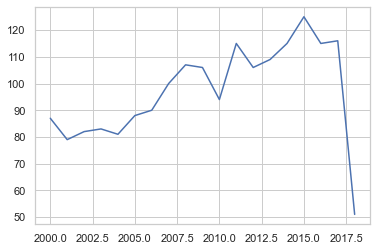

In [46]:
#Gives me only the years of the range 2000-2019
df2["Year"] = df2[df2['Year']>1999]['Year']
df2["Year"] = df2[df2["Year"]<=2019]["Year"]
df2['Year'].value_counts().sort_index().plot()


In [47]:
#Creating a new data frame which I will filter and will be the main data frame I'll be working with.
df3 = df2

In [48]:
df3.filter(['Year','Type','Activity','Injury','Fatal (Y/N)','Activities'])

,Year,Type,Activity,Injury,Fatal (Y/N),Activities
0,2018.0,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,Watersports
1,2018.0,Unprovoked,Standing,Minor injury to left thigh,N,Wading
2,2018.0,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N,Surfing
3,2018.0,Unprovoked,Surfing,Minor injury to lower leg,N,Surfing
4,2018.0,Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Underwater Sports
...,...,...,...,...,...,...
6296,NaN,Unprovoked,Swimming,FATAL,Y,Swimming
6297,NaN,Unprovoked,Diving,FATAL,Y,Underwater Sports
6298,NaN,Unprovoked,Pearl diving,FATAL,Y,Underwater Sports
6299,NaN,Unprovoked,Swimming,FATAL,Y,Swimming


In [49]:
#Checking the nan values now
df3.isnull().sum()

Year           3480
Type              0
Activity          0
Injury            0
Fatal (Y/N)       0
Activities      970
dtype: int64

In [50]:
#removing nan values accordingly
cleaning_data(df3,'Year')
cleaning_data(df3,"Activities")

In [51]:
df3.isnull().sum()

Year           0
Type           0
Activity       0
Injury         0
Fatal (Y/N)    0
Activities     0
dtype: int64

# Visualization

In [54]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Number of attacks by year (2000-2017)')

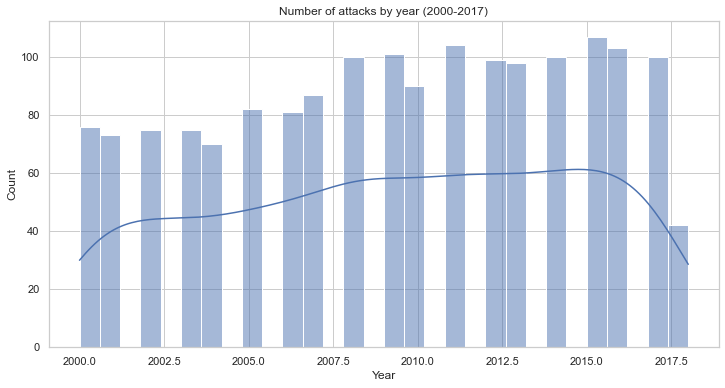

In [72]:
#This graph displays the number of shark attacks per year, the peak year of attacks was in 2015.
fig1 = sns.histplot(x=df.Year, bins=30, kde=True)
fig1.set_title(label='Number of Shark Attacks by year (2000-2017)')

Text(0.5, 1.0, 'Number of Shark Attacks in Water Related Activities (2000-2017)')

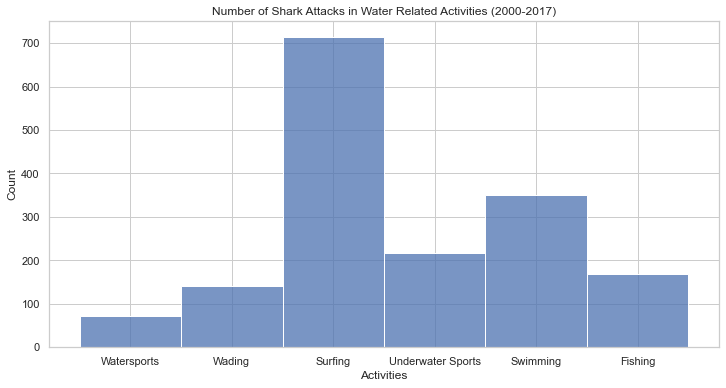

In [73]:
#This graph displays the number of shark attacks in the provided water related activities
fig2 = sns.histplot(x=df.Activities, bins=30)
fig2.set_title(label='Number of Shark Attacks in Water Related Activities (2000-2017)')

Text(0.5, 1.0, 'Number of Fatal Shark Attacks in the Related Years (2000-2017)')

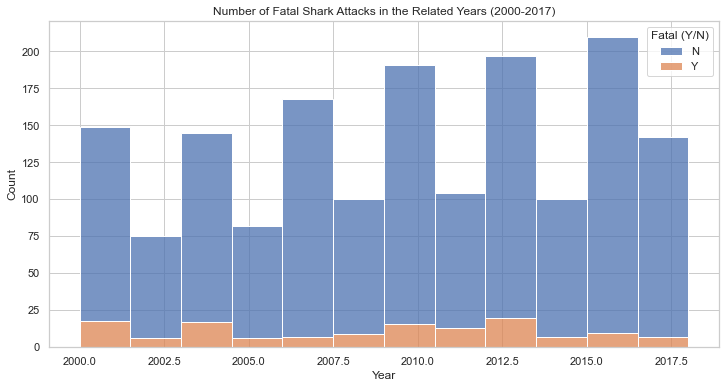

In [74]:
#This graph displays the fatalities in the given years
fig3 = sns.histplot(data=df3, x="Year", hue="Fatal (Y/N)", multiple="stack")
fig3.set_title(label='Number of Fatal Shark Attacks in the Related Years (2000-2017)')

Text(0.5, 1.0, 'Number of Fatal Shark Attacks in Water Related Activities (2000-2017)')

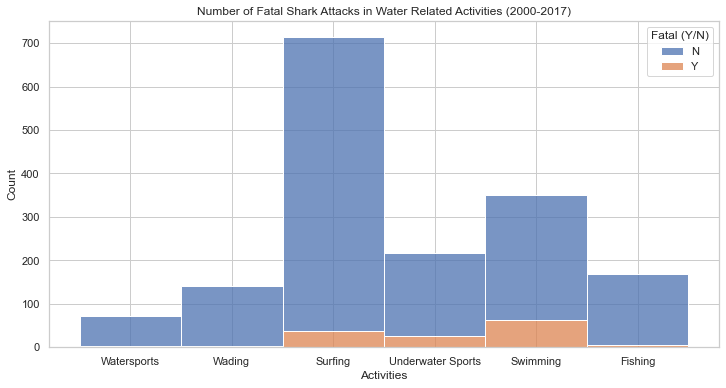

In [76]:
#This graph shows the amount of fatalities in each water sport. 
fig4 = sns.histplot(data=df3, x="Activities", hue="Fatal (Y/N)", multiple="stack")
fig4.set_title(label='Number of Fatal Shark Attacks in Water Related Activities (2000-2017)')